# Time Series Forecasting
### The section described below shows the various types of TimeSeries Forecasting performed on the given datasets.

In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from matplotlib import pyplot
from math import sqrt
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML

In [2]:
from IPython.core.display import display, HTML
display(HTML('<script src="https://www.gstatic.com/dialogflow-console/fast/messenger/bootstrap.js?v=1"></script>'
'<df-messenger intent="WELCOME" chat-title="COVID_ChatBot" agent-id="aaf92dc6-9bc5-44e8-bdce-aad65824f26f" language-code="en"></df-messenger>'))


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/AnuskaK10/CovidDataset/master/dataset4.csv')
#df.head()

In [4]:
#Creating train and test set 
#Index 77 marks the end of the training set
train=df[0:79] 
test=df[77:83]

In [19]:
#Plotting data
#train.new_cases.plot(figsize=(12,5), title= 'Daily New Cases', fontsize=14)
#test.new_cases.plot(figsize=(12,5), title= 'Daily New Cases', fontsize=14)
#pyplot.show()

# Naive Approach

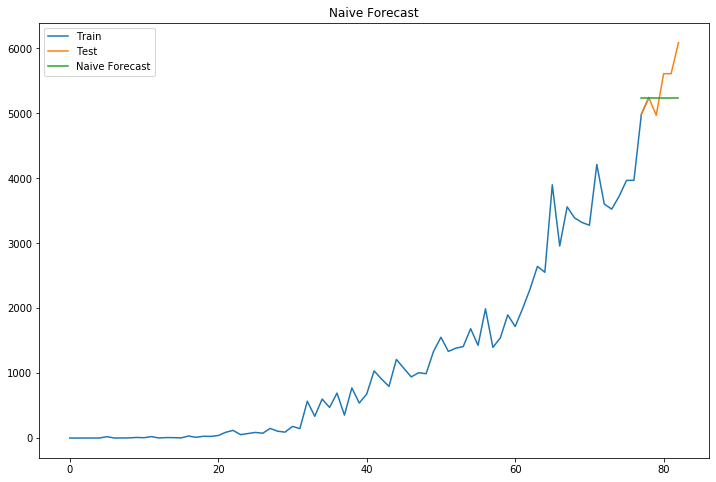

In [6]:
# Naive approach
dd= np.asarray(train.new_cases)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
pyplot.figure(figsize=(12,8))
pyplot.plot(train.index, train['new_cases'], label='Train')
pyplot.plot(test.index,test['new_cases'], label='Test')
pyplot.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
pyplot.legend(loc='best')
pyplot.title("Naive Forecast")
pyplot.show()

In [7]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat.naive))
#print(rms)

# Simple Average Approach

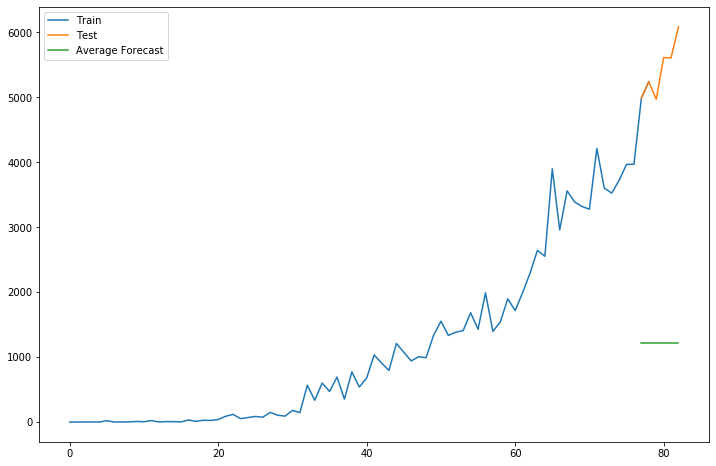

In [8]:
# Simple average
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['new_cases'].mean()
pyplot.figure(figsize=(12,8))
pyplot.plot(train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
pyplot.legend(loc='best')
pyplot.show()

In [9]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.avg_forecast))
#print(rms)

# Moving Average Approach

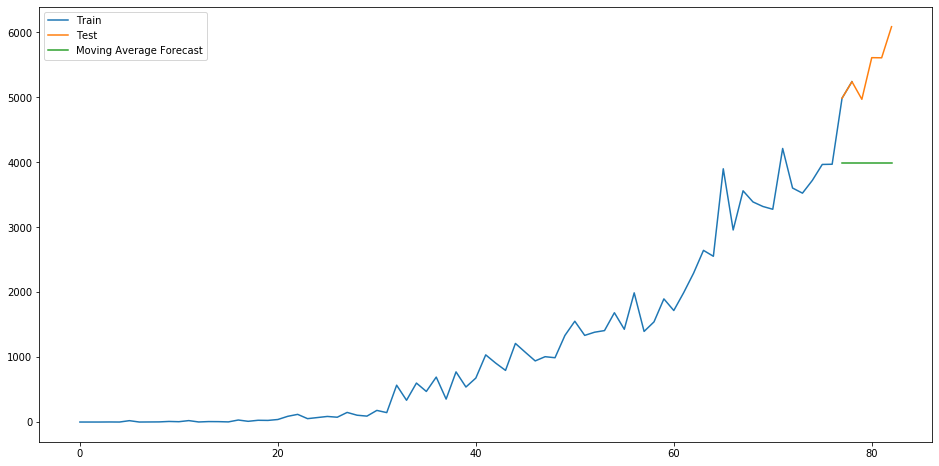

In [10]:
#Moving average
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['new_cases'].rolling(10).mean().iloc[-1]
pyplot.figure(figsize=(16,8))
pyplot.plot(train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
pyplot.legend(loc='best')
pyplot.show()

In [11]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.moving_avg_forecast))
#print(rms)

# Simple Exponential Smoothning Approach

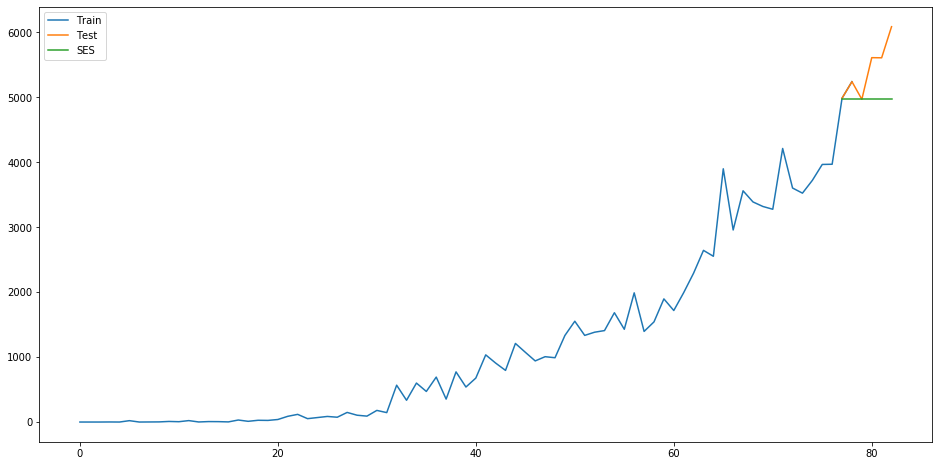

In [12]:
#Simple Exponential Smoothning
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['new_cases'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
pyplot.figure(figsize=(16,8))
pyplot.plot(train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['SES'], label='SES')
pyplot.legend(loc='best')
pyplot.show()

In [13]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.SES))
#print(rms)

# Holt Linear Trend Approach

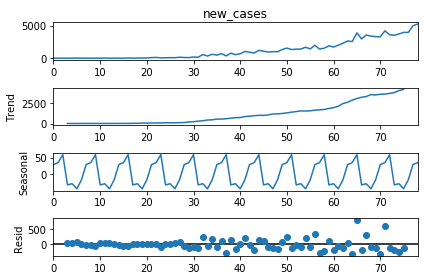

In [14]:
#Holt Linear Trend method
sm.tsa.seasonal_decompose(train.new_cases,period=7).plot()
result = sm.tsa.stattools.adfuller(train.new_cases)
pyplot.show()

F:\Data\Users\Rahul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


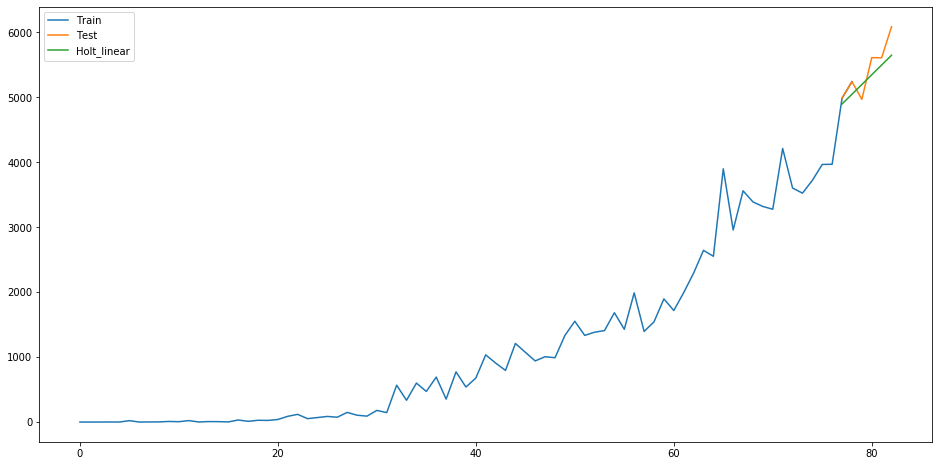

In [15]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['new_cases'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
pyplot.figure(figsize=(16,8))
pyplot.plot(train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
pyplot.legend(loc='best')
pyplot.show()

In [16]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.Holt_linear))
#print(rms)

# Holt Winters Approach

F:\Data\Users\Rahul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
F:\Data\Users\Rahul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


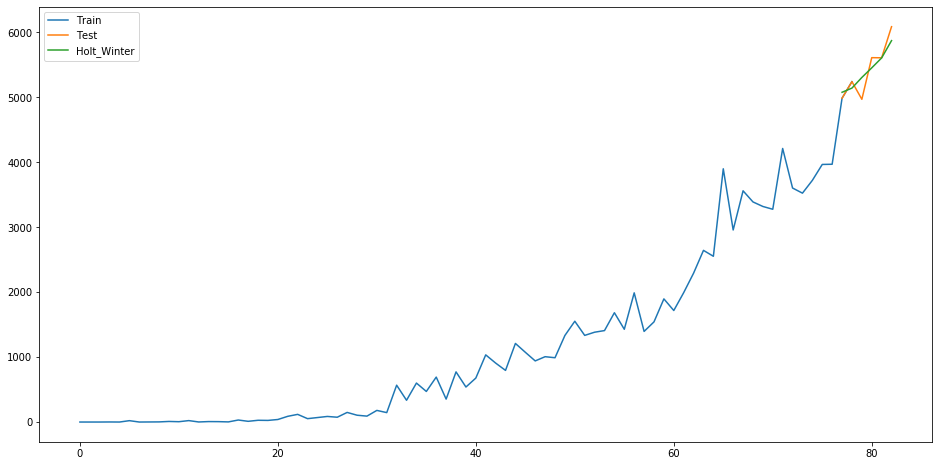

In [17]:
#Holt Winters
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['new_cases']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
pyplot.figure(figsize=(16,8))
pyplot.plot( train['new_cases'], label='Train')
pyplot.plot(test['new_cases'], label='Test')
pyplot.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
pyplot.legend(loc='best')
pyplot.show()

In [18]:
rms = sqrt(mean_squared_error(test.new_cases, y_hat_avg.Holt_Winter))
#print(rms)
